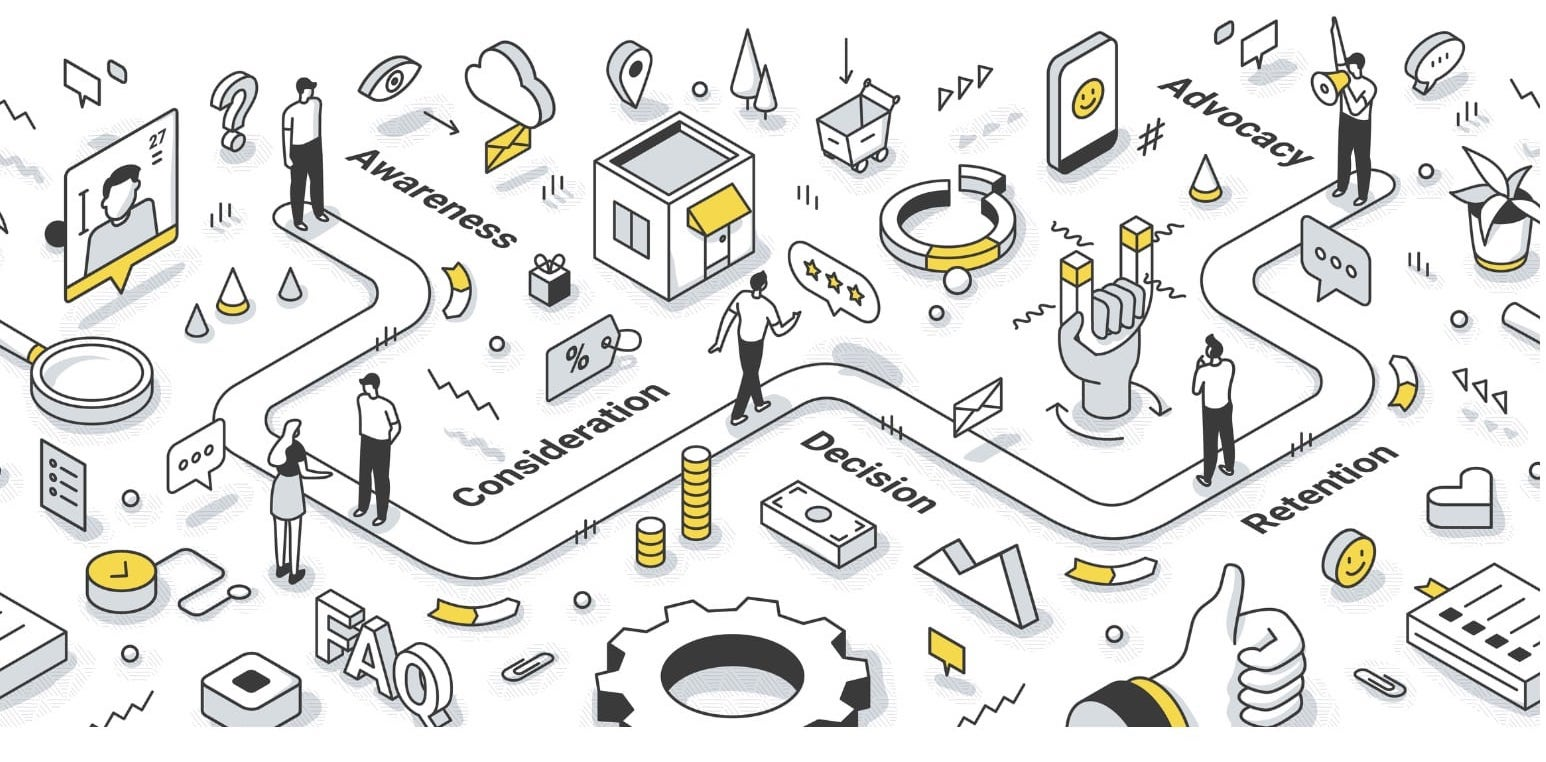

### <font color='gray'> *My Dashboard -------------------------------------------------------------* 
# <font color='black'>Customer journey of travelling in Netherland 


*Thanks to the advancements in this digital era, the gap between consumer and services or products is now bridged by the internet. It can be seen as online consumers are presented with an overwhelming number of options and offerings before they can make a desired purchase. By mapping these choices to communication channels, business can draw conclusions about the path a consumer takes to make a purchase.*

*This project applies interactive dashboard to visualise and monitor data that changing by time. The idea is to get the business keep up with their customer in order to increase optimisation in customer relationship building strategy.*

In [1]:
# import or load the data 1 'TravelData.csv'

import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
df = pd.read_csv('TravelData.csv')

#show all columns in dataframe (same for rows)
pd.set_option('display.max_columns', None)

#View the data - 5 line on the top
#df.head()

In [2]:
# Date time format (YYYY-MM-DD) and split time value into the new columns

df['Time stamp'] = pd.to_datetime(df['Time stamp'])
df['Hour'] = df['Time stamp'].dt.hour
df['Day in week'] = df['Time stamp'].dt.day_name()
df['Day'] = df['Time stamp'].dt.day
df['Month'] = df['Time stamp'].dt.month
df['Year'] = df['Time stamp'].dt.year

In [3]:
# Organize the dataset columns

df.drop('Time stamp', axis=1, inplace=True)

df = df[['User ID', 'Purchase ID', 'Day','Month','Year','Day in week','Hour', 
         'Duration', 'Device type','Type touch', 'Purchase','Purchase own', 'Purchase any'
         , 'Mobile panel', 'Fixed panel']]

#df.head()

In [4]:
# import or load the data 2 'TravelDataDemos.csv'

import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
df1 = pd.read_csv('TravelDataDemos.csv')

#show all columns in dataframe (same for rows)
pd.set_option('display.max_columns', None)


#View the data - 5 line on the top
#df1.head()

In [5]:
# Revise value of column

df1['GenderID']=df1['GenderID'].replace({1:'Male', 2:'Female'})

df1['Region']=df1['Region'].replace({1:'Amsterdam, Rotterdam, Den Haag', 
                                     2:'West', 3:'North',4:'East', 
                                     5:'South'})

df1['Occupation']=df1['Occupation'].replace({1:'entrepreneur', 2:'salaried employment', 
                                            3:'working for the governent',4:'incapacitated', 
                                     5:'unemployed / job seeker', 6:'social assistance benefit',
                                           7:'(early) retirement', 8:'student/scholar',
                                           9: 'housewife/houseman/other',97:'Unknown',
                                           99: 'not applicable'})

df1['Lifestage']=df1['Lifestage'].replace({1:'Young Singles', 2:'Mature Singles', 
                                            3:'Young Couples',4:'Empty Nesters', 
                                     5:'Young Families', 6:'Mature Families',
                                           7:'Established Families', 8:'Single Parents, child(ren)',
                                           9: 'Single Parents, adult child(ren)',97:'Unknown',
                                           })


In [6]:
# Binning the touchpoints into Customer Initiated and Firm Initiated Touchpoints.

df1['Age type']=pd.cut(df1['Age'],[0,30,45,100],right=False,labels=['Young adults ','Middle-aged adults','Old adults'])



## Master Travel Data
#### (First 05 rows shown)

In [7]:
# Merging the two major datasets

df2 = pd.merge(df,df1, on = 'User ID')
df2.head()

,User ID,Purchase ID,Day,Month,Year,Day in week,Hour,Duration,Device type,Type touch,Purchase,Purchase own,Purchase any,Mobile panel,Fixed panel,Region,Size of munucipality,Household size,GenderID,Age,Occupation,Gross income by year,Number of children in household,Social Class,Education (completed),Lifestage,Age type
0,1,3,8,7,2015,Wednesday,19,120.0,FIXED,7,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults
1,1,4,11,3,2015,Wednesday,12,459.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults
2,1,4,11,3,2015,Wednesday,12,183.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults
3,1,4,24,11,2015,Tuesday,22,59.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults
4,1,4,24,11,2015,Tuesday,22,5.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults


In [8]:
# Export as an excel file

df2.to_csv('Master Travel Data.csv')

In [9]:
# (1) Get to know the data
df2.info(verbose = True)

df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   User ID                          1048575 non-null  int64   
 1   Purchase ID                      1048575 non-null  int64   
 2   Day                              1048575 non-null  int64   
 3   Month                            1048575 non-null  int64   
 4   Year                             1048575 non-null  int64   
 5   Day in week                      1048575 non-null  object  
 6   Hour                             1048575 non-null  int64   
 7   Duration                         988575 non-null   float64 
 8   Device type                      1048575 non-null  object  
 9   Type touch                       1048575 non-null  int64   
 10  Purchase                         1048575 non-null  int64   
 11  Purchase own                     1048

,User ID,Purchase ID,Day,Month,Year,Hour,Duration,Type touch,Purchase,Purchase own,Purchase any,Mobile panel,Fixed panel,Size of munucipality,Household size,Age,Gross income by year,Number of children in household,Social Class,Education (completed)
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,988575.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,960891.000000,960891.000000,960891.000000,960891.000000,960891.000000,960891.000000,933178.000000
mean,2.281793e+03,6.401895e+03,1.563513e+01,6.508946e+00,2.015626e+03,1.525932e+01,54.508750,6.058861e+00,3.195232e-01,3.567985e-02,3.195232e-01,5.204971e+00,1.246839e+01,5.209634,2.545768,50.766574,5.103759,0.497106,2.590534,4.953176
std,2.012244e+03,3.706551e+03,8.794336e+00,3.254538e+00,4.839506e-01,5.045530e+00,106.085346,4.832235e+00,4.662921e-01,1.854908e-01,4.662921e-01,7.449180e+00,5.792471e+00,1.577144,1.219785,15.073470,2.027478,0.900815,1.245040,1.818406
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.000000,18.000000,1.000000,0.000000,1.000000,1.000000
25%,9.310000e+02,3.029000e+03,8.000000e+00,4.000000e+00,2.015000e+03,1.200000e+01,6.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000,2.000000,38.000000,4.000000,0.000000,2.000000,4.000000
50%,1.835000e+03,6.297000e+03,1.600000e+01,7.000000e+00,2.016000e+03,1.600000e+01,19.473000,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,5.000000,2.000000,51.000000,5.000000,0.000000,2.000000,5.000000
75%,2.882000e+03,9.914000e+03,2.300000e+01,9.000000e+00,2.016000e+03,2.000000e+01,59.655500,9.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,1.700000e+01,6.000000,4.000000,63.000000,7.000000,1.000000,3.000000,6.000000
max,9.674000e+03,1.225200e+04,3.100000e+01,1.200000e+01,2.016000e+03,2.300000e+01,720.000000,2.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.700000e+01,1.700000e+01,9.000000,10.000000,91.000000,8.000000,8.000000,5.000000,8.000000


In [10]:
# Get column and index names

df2.columns

Index(['User ID', 'Purchase ID', 'Day', 'Month', 'Year', 'Day in week', 'Hour',
       'Duration', 'Device type', 'Type touch', 'Purchase', 'Purchase own',
       'Purchase any', 'Mobile panel', 'Fixed panel', 'Region',
       'Size of munucipality', 'Household size', 'GenderID', 'Age',
       'Occupation', 'Gross income by year', 'Number of children in household',
       'Social Class', 'Education (completed)', 'Lifestage', 'Age type'],
      dtype='object')

In [11]:
# Get data shape

df2.shape

(1048575, 27)

In [12]:
# (2) Find null values

df2.isnull().sum()

User ID                                 0
Purchase ID                             0
Day                                     0
Month                                   0
Year                                    0
Day in week                             0
Hour                                    0
Duration                            60000
Device type                             0
Type touch                              0
Purchase                                0
Purchase own                            0
Purchase any                            0
Mobile panel                            0
Fixed panel                             0
Region                              87684
Size of munucipality                87684
Household size                      87684
GenderID                            87684
Age                                 87684
Occupation                          87684
Gross income by year                87684
Number of children in household     87684
Social Class                      

<AxesSubplot:>

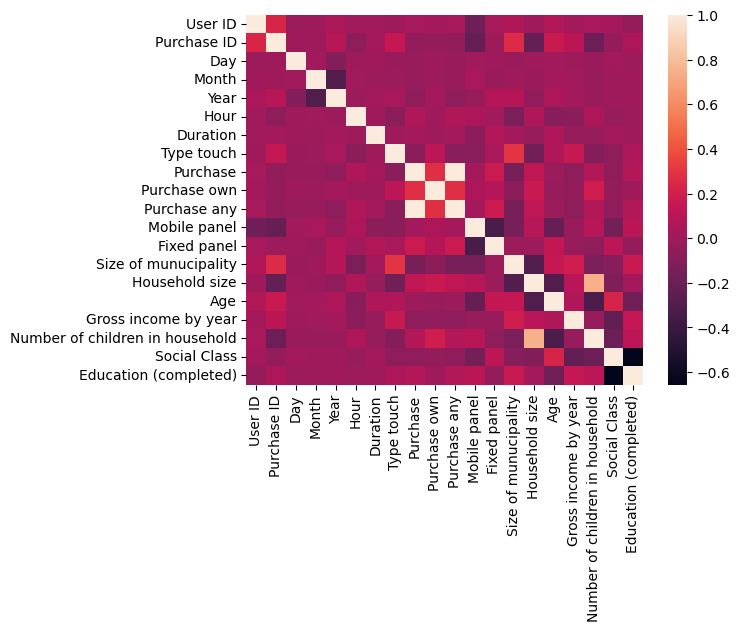

In [13]:
#Correlation plot

sns.heatmap(df2.corr())

### 1. About customer that tends to make a purchase

In [14]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create the year dropdown and month slider widgets
year_dropdown = widgets.Dropdown(options=df2['Year'].unique(), value=df2['Year'].max(), description='Year:')
month_slider = widgets.IntSlider(min=1, max=12, value=df2['Month'].max(), description='Month:')

# Create the radio buttons for the category on x axis
category_radio_buttons = widgets.RadioButtons(options=['Age type', 'GenderID', 'Gross income by year', 'Social Class', 'Region', 'Household size', 'Lifestage', 'Occupation'], value='Age type', description='Category:')

# Define the update_chart function
def update_chart(year, month, category):
    # Filter the dataframe by year and month
    filtered_df = df2[(df2['Year'] == year) & (df2['Month'] == month)]

    # Group the filtered dataframe by the selected category and Device type, and sum the purchases
    grouped_df = filtered_df.groupby([category, 'Device type']).agg({'Purchase': 'sum'}).reset_index()

    # Sort the dataframe by Device type
    sorted_df = grouped_df.sort_values(by='Device type')

    # Create the bar chart using Plotly
    fig1 = px.bar(sorted_df, x=category, y='Purchase', color='Device type',
                 color_discrete_sequence=px.colors.qualitative.Plotly)

    # Update the chart layout
    fig1.update_layout(title=f'Successful purchases by {category} and Device type - {month}/{year}')

    # Show the chart
    with output:
        clear_output()
        display(fig1)

# Define the function to update the chart when the widgets are changed
def update_chart_on_change(change):
    year = year_dropdown.value
    month = month_slider.value
    category = category_radio_buttons.value
    update_chart(year, month, category)

# Add the event listeners for widget changes
year_dropdown.observe(update_chart_on_change, names='value')
month_slider.observe(update_chart_on_change, names='value')
category_radio_buttons.observe(update_chart_on_change, names='value')

# Create the output widget for displaying the chart
output = widgets.Output()

# Display the widgets and initial chart
display(year_dropdown, month_slider, category_radio_buttons)
display(output)
update_chart(df2['Year'].max(), df2['Month'].max(), 'Age type')


Dropdown(description='Year:', index=1, options=(2015, 2016), value=2016)

IntSlider(value=12, description='Month:', max=12, min=1)

RadioButtons(description='Category:', options=('Age type', 'GenderID', 'Gross income by year', 'Social Class',…

Output()

### 2. Time that has a good performance of purchase rate

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Create a new dataframe 
df3 = df2.groupby(['Year','Month','Hour','Day in week'])['Purchase'].sum().reset_index()

df3.head()

# 0h = 12.am

,Year,Month,Hour,Day in week,Purchase
0,2015,1,0,Friday,4
1,2015,1,0,Monday,2
2,2015,1,0,Saturday,2
3,2015,1,0,Sunday,0
4,2015,1,0,Thursday,26


In [16]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import ipywidgets as widgets


# Define the layout of the chart
layout = go.Layout(
    title=f'Sucessful purchase by Weekday and Hour',
    xaxis=dict(title='Weekday'),
    yaxis=dict(title='Hour'),
    hovermode='closest'
)

# Define the widget components
year_dropdown = widgets.Dropdown(
    options=list(df3['Year'].unique()),
    value=df3['Year'].max(),
    description='Year:'
)

month_slider = widgets.IntSlider(
    min=df3['Month'].min(),
    max=df3['Month'].max(),
    step=1,
    value=df3['Month'].max(),
    description='Month:'
)

# Define the callback function to update the chart when the widgets change
def update_chart(year, month):
    filtered_df = df3[(df3['Year'] == year) & (df3['Month'] == month)]
    data = [
        go.Scatter(
            x=filtered_df['Day in week'],
            y=filtered_df['Hour'],
            mode='markers',
            marker=dict(
                size=filtered_df['Purchase'],
                sizemode='diameter',
                sizeref=5,
                sizemin=6,
                color=filtered_df['Purchase'],
                colorscale='Viridis',
                opacity=0.7,
                line=dict(width=2)
            ),
            text=filtered_df['Purchase'],
            hoverinfo='text'
        )
    ]
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

# Define the widget interaction
widgets.interact(update_chart, year=year_dropdown, month=month_slider)



interactive(children=(Dropdown(description='Year:', index=1, options=(2015, 2016), value=2016), IntSlider(valu…

<function __main__.update_chart(year, month)>

### 3. Touchpoints that have a good performance of purchase type

In [17]:
# Binning the touchpoints into Customer Initiated and Firm Initiated Touchpoints.
# Criteria for cutoff points basing on Annex 3

df2['Category touch']=pd.cut(df2['Type touch'],[0,16,22],right=False,labels=['CIT ','FIT'])

# CIT = customer-initiated touchpoint (Annex 2)
# FIT = firm-initiated touchpoint (Annex 2)

df2.head()

,User ID,Purchase ID,Day,Month,Year,Day in week,Hour,Duration,Device type,Type touch,Purchase,Purchase own,Purchase any,Mobile panel,Fixed panel,Region,Size of munucipality,Household size,GenderID,Age,Occupation,Gross income by year,Number of children in household,Social Class,Education (completed),Lifestage,Age type,Category touch
0,1,3,8,7,2015,Wednesday,19,120.0,FIXED,7,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults,CIT
1,1,4,11,3,2015,Wednesday,12,459.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults,CIT
2,1,4,11,3,2015,Wednesday,12,183.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults,CIT
3,1,4,24,11,2015,Tuesday,22,59.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults,CIT
4,1,4,24,11,2015,Tuesday,22,5.0,FIXED,1,0,0,0,0,17,South,6.0,1.0,Male,59.0,salaried employment,2.0,0.0,5.0,2.0,Mature Singles,Old adults,CIT


In [18]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [19]:
# create year dropdown widget
year_dropdown = pn.widgets.Select(name='Year', options=df2['Year'].unique().tolist()) 


# create month slider widget
month_slider = pn.widgets.IntSlider(name='Month', start=1, end=12, 
                                    step=1, value=1)


In [20]:
# Make DataFrame Pipeline Interactive
idf = df2.interactive()

In [21]:
# Create Purchase button
yaxis_pur = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Purchase own', 'Purchase any',],
    button_type='success')

# Interactive dataframe
purchase_pipeline = (
    idf[(idf.Year <= year_dropdown)]
    .groupby(['Category touch', 'Month'])[yaxis_pur].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Month')  
    .reset_index(drop=True))

# Plot the graph
pur_plot = purchase_pipeline.hvplot(x = 'Month', by='Category touch', y=yaxis_pur,line_width=2, title="Purchase rate by category of touchpoint")
pur_plot

### 4.Touchpoints that gain successful purchases

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Create a new dataframe 
df4 = df2.groupby(['Year','Month','Category touch','Type touch'])['Purchase'].sum().reset_index()

df4.head()


,Year,Month,Category touch,Type touch,Purchase
0,2015,1,CIT,1,1689
1,2015,1,CIT,2,4
2,2015,1,CIT,3,11
3,2015,1,CIT,4,318
4,2015,1,CIT,5,27


In [23]:
# To advoid division with 0, transforming all data in "Purchase" column by adding 0.01
df4['Purchase'] += 0.01

df4.head()


,Year,Month,Category touch,Type touch,Purchase
0,2015,1,CIT,1,1689.01
1,2015,1,CIT,2,4.01
2,2015,1,CIT,3,11.01
3,2015,1,CIT,4,318.01
4,2015,1,CIT,5,27.01


In [24]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, Dropdown, IntSlider


def nested_pie_chart(year, month):
    # Filter the dataframe by year and month
    filtered_df = df4[(df4['Year'] == year) & (df4['Month'] == month)]

    # Group the filtered dataframe by category and type, and sum the purchases
    grouped_df = filtered_df.groupby(['Category touch', 'Type touch']).agg({'Purchase': 'sum'}).reset_index()

    # Calculate the total purchases for each category
    category_totals = grouped_df.groupby('Category touch').agg({'Purchase': 'sum'}).reset_index()

    # Add a new column to the grouped dataframe with the percentage of each purchase
    grouped_df['Percentage'] = grouped_df.apply(lambda row: round(row['Purchase'] / category_totals[category_totals['Category touch'] == row['Category touch']]['Purchase'].values[0] * 100, 2), axis=1)
    
    # Replace zero percentage values with 0.0
    grouped_df.loc[grouped_df['Percentage'] == 0, 'Percentage'] = 0.0

    # Create the nested pie chart using Plotly
    fig = px.sunburst(grouped_df, path=['Category touch', 'Type touch'], values='Purchase', color='Type touch',
                      color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_traces(textinfo='label+percent parent')
    
    # Set the chart title
    fig.update_layout(title=f"Touchpoint for successful purchase on {month}/{year}")

    # Show the chart
    fig.show()
    
# Create the year dropdown and month slider widgets
years = df4['Year'].unique()
year_dropdown = Dropdown(options=years, value=years[-1], description='Year:')
month_slider = IntSlider(min=1, max=12, value=12, description='Month:')

# Use the interact function to link the widgets to the nested_pie_chart function
interact(nested_pie_chart, year=year_dropdown, month=month_slider)


interactive(children=(Dropdown(description='Year:', index=1, options=(2015, 2016), value=2016), IntSlider(valu…

<function __main__.nested_pie_chart(year, month)>

### 5. Touchpoints that keep the customer stays

In [25]:
df5 = df2.groupby(['Year','Month','Type touch'])['Duration'].sum().reset_index()


df5.head()


,Year,Month,Type touch,Duration
0,2015,1,1,235646.383
1,2015,1,2,4438.449
2,2015,1,3,233.000
3,2015,1,4,48099.055
4,2015,1,5,11205.568


In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import interact, Dropdown, IntSlider, VBox



# Create the dropdown widget for selecting the year
year_dropdown = Dropdown(options=list(df5["Year"].unique()), description="Year:")

# Create the slider widget for selecting the month
month_slider = IntSlider(min=1, max=12, value=1, description="Month:")

# Define the function that updates the chart based on the selected year and month
def update_chart(year, month):
    filtered_df = df5[(df5["Year"] == year) & (df5["Month"] == month)]
    fig = px.bar(filtered_df, x="Type touch", y="Duration", title=f"Touchpoints that keep the customer stays on {month}/{year}")
    fig.update_layout(xaxis=dict(tickmode='linear', dtick=1), height=500, width=700) # Set the x-axis ticks
    fig.show()

# Combine the widgets into a vertical box
widgets = VBox([year_dropdown, month_slider])

# Use the interact function to update the chart based on the selected widgets
interact(update_chart, year=year_dropdown, month=month_slider)



interactive(children=(Dropdown(description='Year:', options=(2015, 2016), value=2015), IntSlider(value=1, desc…

<function __main__.update_chart(year, month)>

# Annex list ~~~

### Annex : Description of 'TravelData.csv'

01. User ID: unique User ID
02. Purchse ID: unique Purchase ID
03. Time stamp: time stamp including year, month, day, hour, minute and second
04. Duration: number of seconds spend on a touchpoint (capped at 720 seconds)
05. Device type: Indicates whether the touchpoint was reached with a smartphone/tablet (MOBILE) or desktop/laptop (FIXED)
06. Type touch: type of touchpoint (refer Annex 3)
07. Purchase own:indicates whether a certain purchase journey is related to a booking with the travel agency
08. Purchase any: indicates whether a certain purchase journey is related to a booking with the travel agency or a competitor
09. Mobile panel: number of months the UserID was part of the mobile panel (max = 17 = all months)
10. Fixed panel: number of months the UserID was part of the fixed panel (max = 17 = all months)


### Annex 2: Categories of touchpoint

1	The customer-initiated or customer-owned contacts (CIC) is a contact that is initiated by a customer.

2   The firm-initiated or brand-owned contacts (FIC) is any touchpoint that results from a company’s initiative and usually is also managed by it.

### Annex 3: Type of touchpoint

1 :	Accomodations Website.

2 : Accomodations App

3 :	Accomodations Search

4 : Information / comparison Website

5 : Information / comparison App

6 : Information / comparison Search

7 : Touroperator / Travel agent Website Competitor.

8 : Touroperator / Travel agent App Competitor

9 : Touroperator / Travel agent Search Competitor

10: Touroperator / Travel agent Website Focus brand

12: Touroperator / Travel agent Search Focus brand

13: Flight tickets Website

14:	Flight tickets App

15:	Flight tickets Search

16:	generic search

18:	AFFILIATES (FIT)

19:	BANNER (FIT)

20:	EMAIL (FIT)

21:	PREROLLS (FIT)

22:	RETARGETING (FIT)
